In [ ]:


from wrangle import *
from scipy import stats

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

>As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

>In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [ ]:
# schema='zillow'

# sql_database_info_probe(schema)


# query='''
# select * from propertylandusetype


# '''
# read=pd.read_sql(query, get_db_url(schema))
# read



def sql_database_info_probe(schema_input):
    '''
    returns a list of tables


    '''

    schema = schema_input

    query_1 = f'''
    SELECT table_schema "Database Name",
    ROUND(SUM(data_length + index_length) / 1024 / 1024, 4) "DB Size in (MB)" 
    FROM information_schema.tables
    WHERE table_schema= "{schema}" 
    GROUP BY table_schema
    ;
    '''

    query_2 = f'''
    SELECT table_name AS "Tables",
    ROUND(((data_length + index_length) / 1024 / 1024), 4) AS "Size (MB)"
    FROM information_schema.TABLES
    WHERE table_schema = "{schema}"
    ORDER BY (data_length + index_length) DESC;
    '''

    info1 = pd.read_sql(query_1, get_db_url(schema))
    info2 = pd.read_sql(query_2, get_db_url(schema))

    display(f'In {schema} your overlall size(MB) is:', info1)
    tablenames = [x[0] for x in [list(i) for i in info2.values]]
    display(
        f'In {schema} you have the following table names and their sizes:', info2)
    x = [(pd.read_sql(f'describe {x}', get_db_url(schema)))for x in tablenames]
    [display(sympify(f'{(tablenames[i]).capitalize()}'), k)
     for i, k in enumerate(x)]
    y = [(i.Field).str.split() for i in x]
    return y



schema_input='zillow'

# sql_database_info_probe(schema_input)

Google the data dictionary for this data set it was used in a kaggle competition.


In [ ]:
df=prep_zillow_2017(1.25)

df.nunique().sort_values()

cols=set(df.columns.to_list())
nums=cols-{
'fips',                          
'bedroomcnt',                   
'bathroomcnt',
'decade'}
cats=cols-nums

cols=list(cols)

cats=list(cats)
nums=list(nums)

df.head()
df.describe()



In [ ]:


df.head()

In [ ]:
df.info()

In [ ]:
# Shows histograms of the categorical data


# for i in (cats):

  

#     plt.figure(figsize=(10,6))
#     sns.displot(data=df,x=df[i],discrete=True)
    
    
#     plt.show()



In [ ]:
# for i in (nums):  
#     plt.figure(figsize=(10,6))
#     sns.displot(data=df,x=df[i],stat='density',kde=True,discrete=False)
    
    
#     plt.show()


In [ ]:
## Maybe this a good subset to learn on as we are extrem
df1=df.apply(stats.zscore)
df1=df1.apply(abs)
df1=df1.applymap(lambda x: x<=1.25 )
df2=df[df1]
df2.nunique(dropna=True)

df2.isna()
df2.dropna(inplace=True)
df2
a=len(df)
b=len(df2)
x=(b-a)/a
x=f'{x*100:.2f}%'


display(print(f'This is our percent change after removing all the outliers and then the nulls:\n {x}'),df2.skew(),df2.kurt(),df2.kurt().mean())





Use this is the future to make categories binned by the z score. Which would be useful to explicitly identify outliers

In [ ]:
# df3=get_zillow_2017()
df3=df2
a=len(df3)
df3cols=df3.columns.to_list()
df3=remove_outliers_v2(df=df3, k=1.25, col_list=df3cols)
df3.head()

df3.isna()
df3.dropna(inplace=True)
df3

b=len(df3)
x=(b-a)/a
x=f'{x*100:.2f}%'


display(print(f'This is our percent change after removing all the outliers and then the nulls:\n {x}'),df3.skew(),df3.kurt(),df3.kurt().mean())


##here I compared two different ways to exclude outliers by taking the mean of their respective kurtosis by column. Note the two means are nearly the same. I did not take the abs since negative kurtosis is meaningful, Tukey 
tukey_wnorm_zscore_selection=-0.6661175115340092
tukeyalone=-0.24357716836225213
zscore_selection_alone=-0.24166069249521904




In [ ]:
# We look 1.25 stand deviations
for i in (cols):
    

  

    plt.figure(figsize=(10,6))
    sns.displot(data=df2,x=df2[i],stat='density',kde=True,discrete=False)
    
    
    plt.show()





In [ ]:

df['bathdividesbed']=df.bedroomcnt/df.bathroomcnt
df.head()
df[df.bathdividesbed<1]
df['beddividestaxval']=df.taxvaluedollarcnt/df.bedroomcnt
df['bathdividestaxval']=df.taxvaluedollarcnt/df.bathroomcnt
df['areadividestaxval']=df.taxvaluedollarcnt/df.calculatedfinishedsquarefeet
df['bedbathbeyonddividestaxval']=df.taxvaluedollarcnt/(df.calculatedfinishedsquarefeet+df.bathroomcnt+df.bedroomcnt)
df['beddividesarea']=df.calculatedfinishedsquarefeet/df.bedroomcnt
df['bathdividesarea']=df.calculatedfinishedsquarefeet/df.bathroomcnt
df['bathplusbathdividesarea']=df.calculatedfinishedsquarefeet/(df.bathroomcnt+df.bedroomcnt)
df['bathplusbathdividesarea_dividestavval']=df.taxvaluedollarcnt/df['bathplusbathdividesarea']


df[df.columns[0]]
len(df.columns)



colset=set(df.columns)
col_2_combs=list(combinations(colset,2))
len(col_2_combs)

for i in col_2_combs:

    slope, intercept, r_value, p_value, std_err = stats.linregress(df[i[0]],df[i[1]])
    if r_value > .5 and r_value <.99:
        print(f'----------\n{i[0]} vs. {i[1]}:\nslope:\n{slope:.3g} \n\nintercept:\n{intercept:.3g}\n\n r_value:\n{r_value:.3g}\n\n p_value:\n{p_value:.3g} \n\nstd_err:\n{std_err:.3g}\n----------\n\n')




In [ ]:
display(

df.head(),
df.skew(),
df.kurtosis()
)





In [ ]:
df.groupby?


In [ ]:
df.fips.unique

<Figure size 720x432 with 0 Axes>

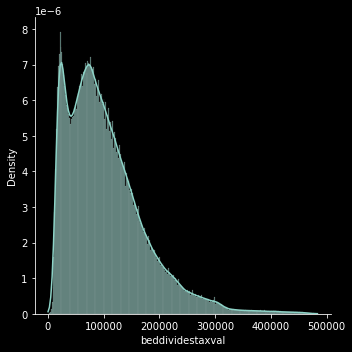

<Figure size 720x432 with 0 Axes>

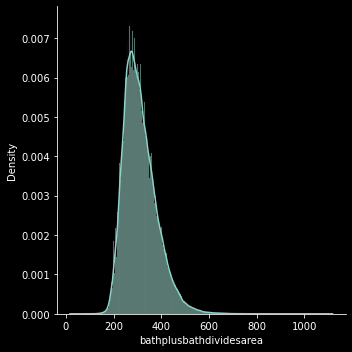

<Figure size 720x432 with 0 Axes>

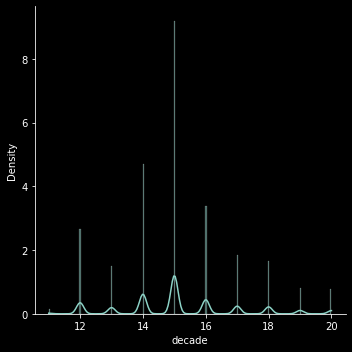

KeyboardInterrupt: 

<Figure size 720x432 with 0 Axes>

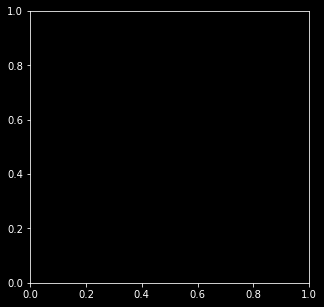

In [34]:
dfa=df[df.fips==6037]


for i in (list(colset)):
    
    

  

    plt.figure(figsize=(10,6))
    sns.displot(data=dfa,x=dfa[i],stat='density',kde=True,discrete=False)
    
    
    plt.show()



In [ ]:


dfb=df[df.fips==6059]


for i in (list(colset)):
    
    

  

    plt.figure(figsize=(10,6))
    sns.displot(data=dfb,x=dfb[i],stat='density',kde=True,discrete=False)
    
    
    plt.show()







In [ ]:

# dfc=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# dfc[f'pairs_column']=list(zip(dfc, dfc.column_2))
# dfc.set_index(['pairs_column'], inplace=True)
# dfc.drop(columns=['column_1', 'column_2'], inplace=True)
# dfc.columns = ['correlation']
# dfc.drop_duplicates(inplace=True)
# dfc[(df.correlation > .70) & (df.correlation < 1)]

Start doing some aggressive group bys and see how things look.

Why did they pick 


 >The normalized graphs (commented out for perfomance), skew and kurtosis show we have to consider some outliers in our data likely need to scale to obtain interesting results.

 >At this step we have simply droped the NAN's as they were a marginal ammount of data and added a categorical colum for decades. The graphs are  for the non categorical cols are not interesting at this step as the highlighted by the extreme skew and kurtosis.


  >FIPS (a unique county identifier code) so it might not be useful othere than to clasify which county this was in



In the lesson review our instructor created a fuction to delete the outliers in each column. Tukey method https://en.wikipedia.org/wiki/Tukey%27s_range_test